In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd

import datetime
df = pd.read_csv("scaled_new.csv")
df.head()
 # Read the existing CSV file into a DataFrame
df.isnull().sum()

Time                             0
air_pressure[mmHg]               0
solar_irridiation[W/m²]          0
electricity_demand_before_24h    0
electricity_demand_before_1h     0
electricity_demand_values[kw]    7
dtype: int64

In [ ]:
df.head()

,Time,air_pressure[mmHg],solar_irridiation[W/m²],electricity_demand_before_24h,electricity_demand_before_1h,electricity_demand_values[kw]
0,12/1/2010 0:00,0.321951,0.0,0.0,0.000000,289.567557
1,12/1/2010 1:00,0.314634,0.0,0.0,0.119342,260.168520
2,12/1/2010 2:00,0.302439,0.0,0.0,0.099477,247.273585
3,12/1/2010 3:00,0.368293,0.0,0.0,0.090764,257.955878
4,12/1/2010 4:00,0.392683,0.0,0.0,0.097982,258.255081


In [ ]:
df['electricity_demand_values[kw]'] = df['electricity_demand_values[kw]'].interpolate(method='linear')

In [ ]:
df['electricity_demand_before_1h'] = df['electricity_demand_values[kw]'].shift(1)
df['electricity_demand_before_24h'] = df['electricity_demand_values[kw]'].shift(24)

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

Time                             0
air_pressure[mmHg]               0
solar_irridiation[W/m²]          0
electricity_demand_before_24h    0
electricity_demand_before_1h     0
electricity_demand_values[kw]    0
dtype: int64

In [ ]:
df.index = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M')
df.head()

,Time,air_pressure[mmHg],solar_irridiation[W/m²],electricity_demand_before_24h,electricity_demand_before_1h,electricity_demand_values[kw]
Time,,,,,,
2010-12-01 00:00:00,12/1/2010 0:00,0.321951,0.0,0.0,0.000000,289.567557
2010-12-01 01:00:00,12/1/2010 1:00,0.314634,0.0,0.0,289.567557,260.168520
2010-12-01 02:00:00,12/1/2010 2:00,0.302439,0.0,0.0,260.168520,247.273585
2010-12-01 03:00:00,12/1/2010 3:00,0.368293,0.0,0.0,247.273585,257.955878
2010-12-01 04:00:00,12/1/2010 4:00,0.392683,0.0,0.0,257.955878,258.255081


<Axes: xlabel='Time'>

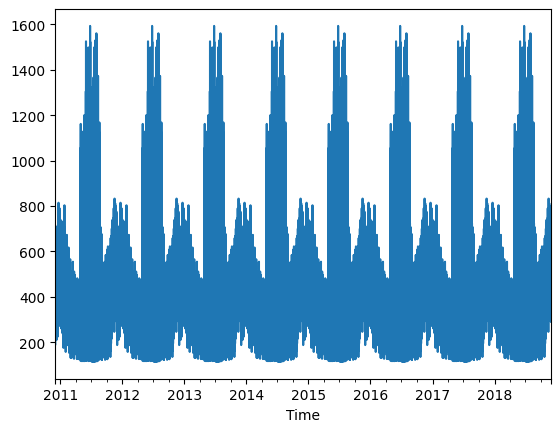

In [ ]:
temp = df['electricity_demand_values[kw]']
temp.plot()

In [ ]:
df = df[3::4]
df

,Time,air_pressure[mmHg],solar_irridiation[W/m²],electricity_demand_before_24h,electricity_demand_before_1h,electricity_demand_values[kw]
Time,,,,,,
2010-12-01 03:00:00,12/1/2010 3:00,0.368293,0.000000,0.000000,247.273585,257.955878
2010-12-01 07:00:00,12/1/2010 7:00,0.446341,0.832618,0.000000,337.423503,436.870633
2010-12-01 11:00:00,12/1/2010 11:00,0.404878,0.819742,0.000000,312.635936,281.617395
2010-12-01 15:00:00,12/1/2010 15:00,0.380488,0.856938,0.000000,231.510100,252.034554
2010-12-01 19:00:00,12/1/2010 19:00,0.404878,0.238913,0.000000,588.695992,599.318547
...,...,...,...,...,...,...
2018-11-28 07:00:00,11/28/2018 7:00,0.495122,0.537911,411.300528,434.292911,350.197735
2018-11-28 11:00:00,11/28/2018 11:00,0.507317,0.894134,353.657768,290.491178,288.899625
2018-11-28 15:00:00,11/28/2018 15:00,0.470732,0.969957,491.032178,470.488663,459.789921


In [ ]:
def df_to_X_y(df, window_size=3):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
import numpy as np
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70077, 3, 1), (70077,))

In [ ]:
X_train1, y_train1 = X1[:56000], y1[:56000]
X_val1, y_val1 = X1[56000:63000], y1[56000:63000]
X_test1, y_test1 = X1[63000:], y1[63000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((56000, 3, 1), (56000,), (7000, 3, 1), (7000,), (7077, 3, 1), (7077,))

In [ ]:
!pip install optuna

import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.0 MB/s eta 0:00:00


In [ ]:
X_train_xgb = X_train1.reshape(X_train1.shape[0], -1)
X_val_xgb = X_val1.reshape(X_val1.shape[0], -1)
X_test_xgb = X_test1.reshape(X_test1.shape[0], -1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import xgboost as xgb
def objective(trial):
    xgb_params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
    }
    model = xgb.XGBRegressor(**xgb_params)
    model.fit(X_train_xgb, y_train1, early_stopping_rounds=5, eval_set=[(X_val_xgb, y_val1)], verbose=False)
    y_val_pred = model.predict(X_val_xgb)
    return mean_squared_error(y_val1, y_val_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print('Best trial:', study.best_trial.params)

In [ ]:
from xgboost import XGBRegressor
X_train_xgb = X_train1.reshape(X_train1.shape[0], -1)

model = XGBRegressor(learning_rate=0.18716897683093492,
                     n_estimators = 441,
                     max_depth = 10, subsample= 0.8722229606966574,
                     colsample_bytree = 0.6914189349167907,
                     reg_alpha = 0.5877525400269609,
                     reg_lambda = 1.7506182466432472)
model.fit(X_train_xgb, y_train1)
model.fit(X_train_xgb, y_train1, eval_set=[(X_val1.reshape(X_val1.shape[0], -1), y_val1)], early_stopping_rounds=5, verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6914189349167907, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.18716897683093492, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=441, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import r2_score

# Making predictions on the test set
prediction = model.predict(X_test_xgb)

# Calculating the R² value
r2_value = r2_score(y_test1, prediction)
print(f'Model 2 R-squared (R2) value: {r2_value}')

Model 2 R-squared (R2) value: 0.997253122535582


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
model1 = Sequential()
model1.add(LSTM(units=50, activation='relu', input_shape=(3, 1)))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
model1.fit(X_train1, y_train1, epochs=10, batch_size=32, validation_data=(X_val1, y_val1), verbose=0)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from keras.callbacks import EarlyStopping

# Define the search space
space = {
    'n_layers': hp.choice('n_layers', range(1, 5)),  # Up to 4 hidden layers
    'units_per_layer': hp.choice('units_per_layer', [
        [hp.choice('units_layer1_1', [16, 32, 64, 128])],
        [hp.choice('units_layer1_2', [16, 32, 64, 128]), hp.choice('units_layer2_2', [16, 32, 64, 128])],
        [hp.choice('units_layer1_3', [16, 32, 64, 128]), hp.choice('units_layer2_3', [16, 32, 64, 128]), hp.choice('units_layer3_3', [16, 32, 64, 128])],
        [hp.choice('units_layer1_4', [16, 32, 64, 128]), hp.choice('units_layer2_4', [16, 32, 64, 128]), hp.choice('units_layer3_4', [16, 32, 64, 128]), hp.choice('units_layer4_4', [16, 32, 64, 128])]
    ]),
    'dropout': hp.uniform('dropout', 0, 0.5)
}

# Define the objective function
def objective(params):
    model = Sequential([
        LSTM(units=50, activation='relu', input_shape=(3, 1))  # LSTM layer
    ])

    # Adding Dense layers based on the number of layers selected
    for units in params['units_per_layer']:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation='linear'))  # Output layer
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

    # Early stopping to avoid overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_data=(X_val1, y_val1), verbose=0, callbacks=[early_stop])

    # Evaluate the model
    loss = model.evaluate(X_val1, y_val1, verbose=0)
    return {'loss': loss, 'status': STATUS_OK}

# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

print("Best: ", best)

100%|██████████| 20/20 [24:03<00:00, 72.16s/trial, best loss: 578.3414916992188]
Best:  {'dropout': 0.040706270952033385, 'n_layers': 1, 'units_layer1_2': 3, 'units_layer2_2': 2, 'units_per_layer': 1}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    # Define the hyperparameters to tune
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
    }

    # Create the Random Forest model
    model = RandomForestRegressor(**rf_params, random_state=42)

    # Fit the model on the training dataset
    model.fit(X_train_xgb, y_train1)  # Make sure X_train_rf, y_train_rf are your training data

    # Predict on the validation dataset
    y_val_pred = model.predict(X_val_xgb)  # Make sure X_val_rf, y_val_rf are your validation data

    # Calculate the mean squared error on the validation data
    mse = mean_squared_error(y_val1, y_val_pred)

    return mse

# Create a study object
study = optuna.create_study(direction='minimize')

# Execute an optimization by using an objective function
study.optimize(objective, n_trials=20)

# Output the best hyperparameters
print('Best trial:', study.best_trial.params)

[I 2024-04-29 07:52:12,879] A new study created in memory with name: no-name-e3c1576d-ea69-4897-91f2-b2ca4e041ae6
[I 2024-04-29 07:52:29,982] Trial 0 finished with value: 14.66692824593806 and parameters: {'n_estimators': 265, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 14.66692824593806.
[I 2024-04-29 07:52:39,692] Trial 1 finished with value: 917.4589987568088 and parameters: {'n_estimators': 244, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 14.66692824593806.
[I 2024-04-29 07:52:55,358] Trial 2 finished with value: 261.9364372523947 and parameters: {'n_estimators': 296, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 14.66692824593806.
[I 2024-04-29 07:53:01,087] Trial 3 finished with value: 200.5881529289489 and parameters: {'n_estimators': 113, 'max_depth': 14, 'min_samp

Best trial: {'n_estimators': 999, 'max_depth': 23, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'auto'}


In [ ]:
#X_test_lstm = X_test1.reshape((X_test1.shape[0], 3, 1))
X_test_xgb = X_test1.reshape(X_test1.shape[0], -1)

#lstm_predictions = model1.predict(X_test1)
xgb_predictions = model.predict(X_test_xgb)

#lstm_predictions = lstm_predictions.reshape(X_test1.shape[0], 1)
xgb_predictions = xgb_predictions.reshape(X_test1.shape[0], 1)

# Make predictions using the hybrid model
#predictions = (lstm_predictions + xgb_predictions)/2

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#predictions = predictions.reshape(-1)
rmse = np.sqrt(mean_squared_error(y_test1, predictions))
print(f'RMSE: {rmse}')

mae = mean_absolute_error(y_test1, predictions)
print(f"Mean Absolute Error: {mae}")

In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test1, predictions)

print(f'R-squared (R2) score: {r2}')

R-squared (R2) score: 0.9927160835114013


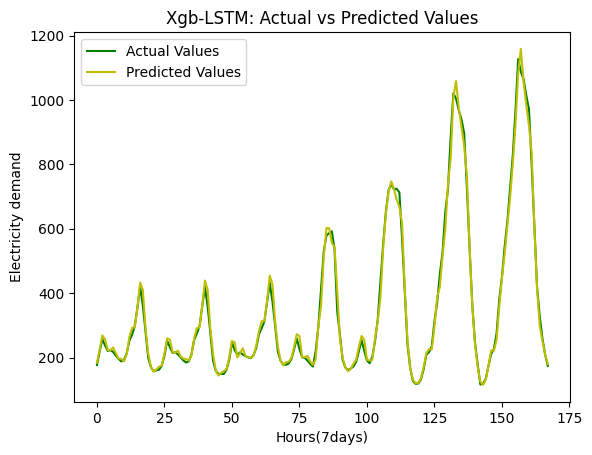

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test1, 'g', label='Actual Values')
plt.plot(predictions, 'y', label='Predicted Values')
plt.xlabel('Hours(7days)')
plt.ylabel('Electricity demand')
plt.title('Xgb-LSTM: Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators = 999,
                               max_depth = 23,
                               min_samples_split = 7,
                               min_samples_leaf = 3,
                               max_features = 'auto',
                               random_state = 42)
model2.fit(X_train_xgb, y_train1)
model2.fit(X_val_xgb, y_val1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=23, max_features='auto', min_samples_leaf=3,
                      min_samples_split=7, n_estimators=999, random_state=42)

In [ ]:
from sklearn.metrics import r2_score

# Making predictions on the test set
prediction2 = model2.predict(X_test_xgb)

# Calculating the R² value
r2_value = r2_score(y_test1, prediction2)
print(f'Model 2 R-squared (R2) value: {r2_value}')

Model 2 R-squared (R2) value: 0.9883515673557202


In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

model3 = ExtraTreesRegressor(n_estimators=100, max_depth=10)
model3.fit(X_train_xgb, y_train1)
model3.fit(X_val_xgb, y_val1)

ExtraTreesRegressor(max_depth=10)

In [ ]:
from sklearn.metrics import r2_score

# Making predictions on the test set
prediction3 = model3.predict(X_test_xgb)

# Calculating the R² value
r2_value = r2_score(y_test1, prediction3)
print(f'Model 2 R-squared (R2) value: {r2_value}')

Model 2 R-squared (R2) value: 0.9791596128676263


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import math

# Create meta ensemble predictions by taking the mean
meta_preds1 = np.mean([prediction, prediction2], axis=0)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test1, meta_preds1)

rmse = math.sqrt(meta_mse)
print(f'Meta Ensemble Model Mean Squared Error: {rmse}')

# Calculate R2 score
meta_r2 = r2_score(y_test1, meta_preds1)

print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')
meta_mae = mean_absolute_error(y_test1, meta_preds1)
print(f"Mean Absolute Error: {meta_mae}")

Meta Ensemble Model Mean Squared Error: 17.80172711239477
Meta Ensemble Model R-squared (R2): 0.9952235573116033
Mean Absolute Error: 10.925947691141745


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import math

# Create meta ensemble predictions by taking the mean
meta_preds3 = np.mean([prediction2, prediction3], axis=0)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test1, meta_preds3)

rmse = math.sqrt(meta_mse)
print(f'Meta Ensemble Model Mean Squared Error: {rmse}')

# Calculate R2 score
meta_r2 = r2_score(y_test1, meta_preds3)

print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')
meta_mae = mean_absolute_error(y_test1, meta_preds3)
print(f"Mean Absolute Error: {meta_mae}")

Meta Ensemble Model Mean Squared Error: 31.147775678360944
Meta Ensemble Model R-squared (R2): 0.985377071076524
Mean Absolute Error: 21.375388031118806


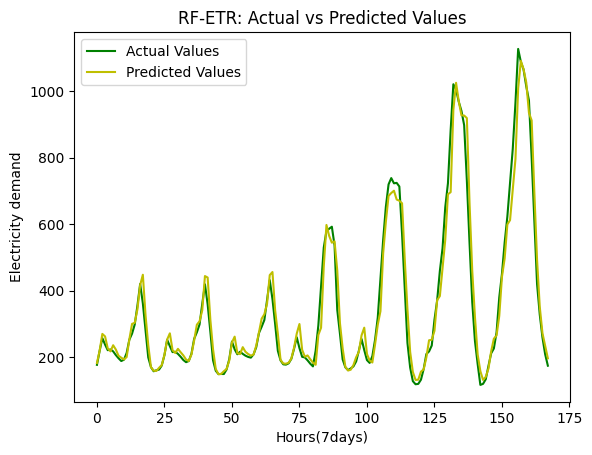

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test1, 'g', label='Actual Values')
plt.plot(meta_preds1, 'y', label='Predicted Values')
plt.xlabel('Hours(7days)')
plt.ylabel('Electricity demand')
plt.title('RF-ETR: Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import math

# Create meta ensemble predictions by taking the mean
meta_preds4 = np.mean([prediction, prediction3], axis=0)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test1, meta_preds4)

rmse = math.sqrt(meta_mse)
print(f'Meta Ensemble Model Mean Squared Error: {rmse}')

# Calculate R2 score
meta_r2 = r2_score(y_test1, meta_preds4)

print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')
meta_mae = mean_absolute_error(y_test1, meta_preds4)
print(f"Mean Absolute Error: {meta_mae}")

Meta Ensemble Model Mean Squared Error: 21.720479710416857
Meta Ensemble Model R-squared (R2): 0.9928891892907873
Mean Absolute Error: 15.382810297737153


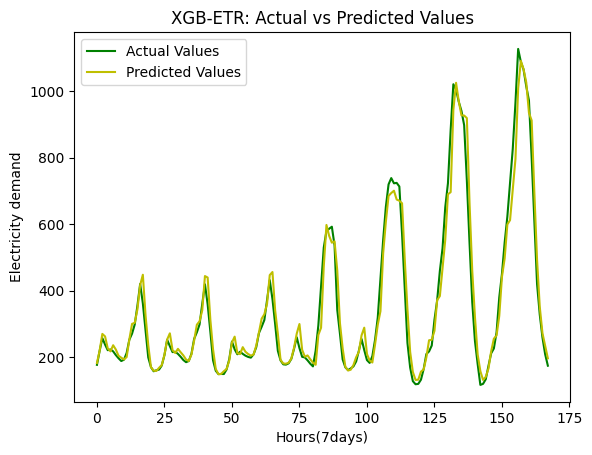

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test1, 'g', label='Actual Values')
plt.plot(meta_preds1, 'y', label='Predicted Values')
plt.xlabel('Hours(7days)')
plt.ylabel('Electricity demand')
plt.title('XGB-ETR: Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
ereg = VotingRegressor(estimators=[('model1', model), ('model2', model2), ('model3', model3)])

ereg = ereg.fit(X_train_xgb, y_train1)

train_preds = ereg.predict(X_train_xgb)

# Calculate training R-squared (R2)
train_r2 = r2_score(y_train1, train_preds)
print(f'Training R-squared (R2): {train_r2}')

# Calculate training RMSE
train_rmse = np.sqrt(mean_squared_error(y_train1, train_preds))
print(f'Training Root Mean Squared Error (RMSE): {train_rmse}')

# Calculate training RMSE
train_mae = np.sqrt(mean_absolute_error(y_train1, train_preds))
print(f'Training Root Mean absolute Error (MAE): {train_mae}')

# Predict on validation set
val_preds = ereg.predict(X_val_xgb)

# Evaluate ensemble model on validation set
val_mse = mean_squared_error(y_val1, val_preds)
print(f'Validation Mean Squared Error: {val_mse}')

val_r2 = r2_score(y_val1, val_preds)
print(f'Validation R-squared (R2): {val_r2}')

val_mae = mean_absolute_error(y_val1, val_preds)
print(f"Validation Mean Absolute Error: {val_mae}")

meta_preds2 = ereg.predict(X_test_xgb)

# Evaluate meta ensemble model
meta_mse = mean_squared_error(y_test1, meta_preds2)
print(f'Meta Ensemble Model Mean Squared Error: {meta_mse}')

# Calculate R2 score
meta_r2 = r2_score(y_test1, meta_preds2)
print(f'Meta Ensemble Model R-squared (R2): {meta_r2}')

meta_mae = mean_absolute_error(y_test1, meta_preds2)
print(f"Mean Absolute Error: {meta_mae}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Training R-squared (R2): 0.996356351397662
Training Root Mean Squared Error (RMSE): 14.153509153381806
Training Root Mean absolute Error (MAE): 3.1517683986283282
Validation Mean Squared Error: 235.27457554958755
Validation R-squared (R2): 0.9963693281077065
Validation Mean Absolute Error: 10.795566453057175
Meta Ensemble Model Mean Squared Error: 222.6663650388992
Meta Ensemble Model R-squared (R2): 0.9966438998524871
Mean Absolute Error: 10.355178352771444


In [ ]:
train_mae = mean_absolute_error(y_train1, train_preds)
print(f"Validation Mean Absolute Error: {train_mae}")

Validation Mean Absolute Error: 9.933644038592178


In [ ]:
import math
meta_mse = mean_squared_error(y_test1, meta_preds2)
rmse = math.sqrt(meta_mse)
print(f'Meta Ensemble Model Mean Squared Error: {rmse}')

Meta Ensemble Model Mean Squared Error: 14.89539490538744


In [ ]:
test_results = pd.DataFrame(X_test_xgb)

# Add actual values
test_results['Actual'] = y_test1

# Add predicted values
test_results['Predicted'] = meta_preds2

# Save to CSV
test_results.to_csv('test_data_with_forecasted_results.csv', index=False)

from google.colab import files
files.download('test_data_with_forecasted_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

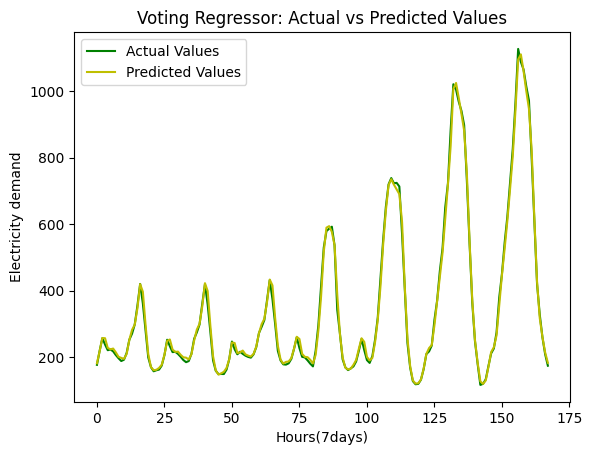

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test1, 'g', label='Actual Values')
plt.plot(meta_preds2, 'y', label='Predicted Values')
plt.xlabel('Hours(7days)')
plt.ylabel('Electricity demand')
plt.title('Voting Regressor: Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
from tensorflow.keras.optimizers import Adam

model5 = Sequential()
model5.add(InputLayer((3, 1)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'linear'))

model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import keras
import tensorflow as tf
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + keras.backend.epsilon())

In [ ]:
cp2 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),r_squared])

In [ ]:
model5.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 13507.9609 - root_mean_squared_error: 116.2238 - r_squared: 0.7943 - val_loss: 1252.4646 - val_root_mean_squared_error: 35.3902 - val_r_squared: 0.8957
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 9290.9932 - root_mean_squared_error: 96.3898 - r_squared: 0.8593 - val_loss: 1184.1927 - val_root_mean_squared_error: 34.4121 - val_r_squared: 0.8941
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 6561.6499 - root_mean_squared_error: 81.0040 - r_squared: 0.8996 - val_loss: 1251.7869 - val_root_mean_squared_error: 35.3806 - val_r_squared: 0.8823
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 4786.9722 - root_mean_squared_error: 69.1880 - r_squared: 0.9244 - val_loss: 1169.9360 - val_root_mean_squared_error: 34.2043 - val_r_squared: 0.8977
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 3645.3433 - ro

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred1 = model1.predict(X_test1)

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")

6/6 [==============================] - 0s 3ms/step
Root Mean Squared Error on the test set: 38.544140376513894


In [ ]:
model6 = Sequential()
model6.add(InputLayer((3, 1)))
model6.add(Conv1D(64, kernel_size=2))
model6.add(Flatten())
model6.add(Dense(8, 'relu'))
model6.add(Dense(1, 'linear'))

model6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 1032      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1233 (4.82 KB)
Trainable params: 1233 (4.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),r_squared])

In [ ]:
model6.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 3453.3914 - root_mean_squared_error: 58.7656 - r_squared: 0.9264 - val_loss: 2200.5481 - val_root_mean_squared_error: 46.9100 - val_r_squared: 0.8066
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2671.5647 - root_mean_squared_error: 51.6872 - r_squared: 0.9430 - val_loss: 1838.0782 - val_root_mean_squared_error: 42.8728 - val_r_squared: 0.8379
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2326.4453 - root_mean_squared_error: 48.2332 - r_squared: 0.9509 - val_loss: 1569.2230 - val_root_mean_squared_error: 39.6134 - val_r_squared: 0.8608
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2113.8413 - root_mean_squared_error: 45.9765 - r_squared: 0.9559 - val_loss: 1390.5353 - val_root_mean_squared_error: 37.2899 - val_r_squared: 0.8767
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2013.7234 - root_mea

In [ ]:
# Make predictions on the test set
y_pred2 = model6.predict(X_test1)

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred2)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")

6/6 [==============================] - 0s 2ms/step
Root Mean Squared Error on the test set: 39.388340173581554


In [ ]:
from tensorflow.keras.models import Sequential, Model

concatenated = concatenate([model5.output, model6.output])

# Add a dense layer for further processing
merged = Dense(64, activation='relu')(concatenated)

# Output layer for the final prediction
output_layer = Dense(1, activation='linear')(merged)

# Create the ensemble model
ensemble_model = Model(inputs=[model5.input, model6.input], outputs=output_layer)

# Compile the model
ensemble_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the ensemble model
ensemble_model.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
# Train the ensemble model
history = ensemble_model.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_data=(X_val1,y_val1))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1932.2279 - val_loss: 2059.1514
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1928.0359 - val_loss: 2051.2737
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1927.0055 - val_loss: 2065.0571
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1909.0660 - val_loss: 2151.4268
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1899.5721 - val_loss: 2122.5127
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1908.2900 - val_loss: 2097.9309
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1898.6426 - val_loss: 2080.1462
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1891.4807 - val_loss: 2005.8190
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1883.3380 - val_loss: 2032.9535
Epoch 10/10
1875/

In [ ]:
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Make predictions on the test set
y_pred = ensemble_model.predict([X_test1, X_test1])

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")

mae = mean_absolute_error(y_test1, y_pred)
print(f"Mean Absolute Error: {mae}")

6/6 [==============================] - 1s 3ms/step
Root Mean Squared Error on the test set: 39.763573268513696
Mean Absolute Error: 25.85958468931304


In [ ]:
model7 = Sequential()
model7.add(InputLayer((3, 1)))
model7.add(GRU(64))
model7.add(Dense(8, 'relu'))
model7.add(Dense(1, 'linear'))
model7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model7/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), r_squared])

In [ ]:
model7.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 198808.6406 - root_mean_squared_error: 445.8796 - r_squared: -2.8799 - val_loss: 120056.1641 - val_root_mean_squared_error: 346.4912 - val_r_squared: -8.5679
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 165881.7344 - root_mean_squared_error: 407.2858 - r_squared: -2.1958 - val_loss: 88877.3516 - val_root_mean_squared_error: 298.1230 - val_r_squared: -5.8598
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 128995.5781 - root_mean_squared_error: 359.1595 - r_squared: -1.4183 - val_loss: 57851.4062 - val_root_mean_squared_error: 240.5232 - val_r_squared: -3.2547
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 95794.9531 - root_mean_squared_error: 309.5076 - r_squared: -0.7442 - val_loss: 33965.4062 - val_root_mean_squared_error: 184.2971 - val_r_squared: -1.3733
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/

In [ ]:
# Make predictions on the test set
y_pred4 = model7.predict(X_test1)

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred4)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")

6/6 [==============================] - 1s 6ms/step
Root Mean Squared Error on the test set: 67.301436446377


In [ ]:
from tensorflow.keras.models import Sequential, Model

concatenated = concatenate([model6.output, model7.output])

# Add a dense layer for further processing
merged = Dense(64, activation='relu')(concatenated)

# Output layer for the final prediction
output_layer = Dense(1, activation='linear')(merged)

# Create the ensemble model
ensemble_model2 = Model(inputs=[model6.input, model7.input], outputs=output_layer)

# Compile the model
ensemble_model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the ensemble model
ensemble_model2.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
history = ensemble_model2.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_data=(X_val1, y_val1))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1893.1708 - val_loss: 2018.8052
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1889.7834 - val_loss: 2290.6450
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1886.6492 - val_loss: 2050.6335
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1868.2571 - val_loss: 2000.5879
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1880.1841 - val_loss: 2038.3011
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1870.2712 - val_loss: 2149.9839
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1851.4053 - val_loss: 2031.4915
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1869.3378 - val_loss: 2015.1487
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1838.9885 - val_loss: 1976.9840
Epoch 10/10
1875/1

In [ ]:
# Make predictions on the test set
y_pred5 = ensemble_model2.predict([X_test1, X_test1])

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred5)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")

mae = mean_absolute_error(y_test1, y_pred5)
print(f"Mean Absolute Error: {mae}")

6/6 [==============================] - 0s 3ms/step
Root Mean Squared Error on the test set: 37.05779000652851
Mean Absolute Error: 24.066224297380725


In [ ]:
concatenated = concatenate([model5.output, model7.output])

# Add a dense layer for further processing
merged = Dense(64, activation='relu')(concatenated)

# Output layer for the final prediction
output_layer = Dense(1, activation='linear')(merged)

# Create the ensemble model
ensemble_model3 = Model(inputs=[model5.input, model7.input], outputs=output_layer)

# Compile the model
ensemble_model3.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
ensemble_model3.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
history = ensemble_model3.fit([X_train1, X_train1], y_train1, epochs=10, batch_size=32, validation_data=(X_val1, y_val1))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2437.5818 - val_loss: 2286.1348
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2374.1128 - val_loss: 5208.3672
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 2356.7148 - val_loss: 2225.9053
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 2340.8274 - val_loss: 2724.1533
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2483.6130 - val_loss: 2364.0518
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2288.4019 - val_loss: 3562.7756
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 2250.9451 - val_loss: 2082.5427
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2217.2188 - val_loss: 2457.2041
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2123.2603 - val_loss: 2126.4641
Epoch 10/10
1875/

In [ ]:
# Make predictions on the test set
y_pred6 = ensemble_model3.predict([X_test1, X_test1])

# Evaluate the ensemble model
mse = mean_squared_error(y_test1, y_pred6)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on the test set: {rmse}")
mae = mean_absolute_error(y_test1, y_pred6)
print(f"Mean Absolute Error: {mae}")

6/6 [==============================] - 1s 5ms/step
Root Mean Squared Error on the test set: 39.29269119017885
Mean Absolute Error: 27.397980515187875


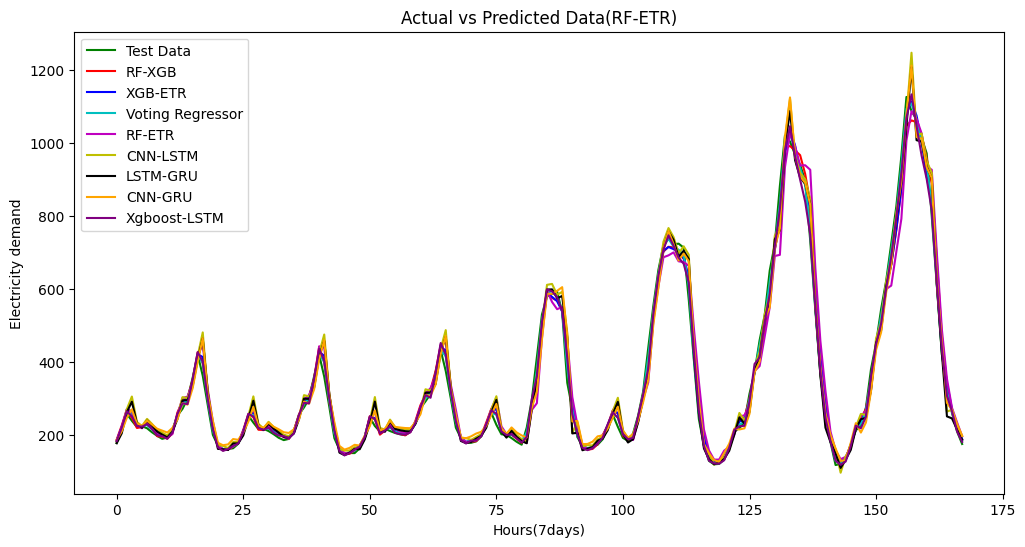

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting test data
plt.plot(range(len(y_test1)), y_test1, 'g', label='Test Data')

# Plotting predicted data
plt.plot(range(len(meta_preds1)), meta_preds1, 'r', label='RF-XGB')
plt.plot(range(len(meta_preds4)), meta_preds4, 'b', label='XGB-ETR')
plt.plot(range(len(meta_preds2)), meta_preds2, 'c', label='Voting Regressor')
plt.plot(range(len(meta_preds3)), meta_preds3, 'm', label='RF-ETR')
plt.plot(range(len(y_pred)), y_pred, 'y', label='CNN-LSTM')
plt.plot(range(len(y_pred5)), y_pred5, 'k', label='LSTM-GRU')
plt.plot(range(len(y_pred6)), y_pred6, 'orange', label='CNN-GRU')
plt.plot(range(len(predictions)), predictions, 'purple', label='Xgboost-LSTM')

# Adding labels and legend
plt.title('Actual vs Predicted Data(RF-ETR)')
plt.xlabel('Hours(7days)')
plt.ylabel('Electricity demand')
plt.legend()

# Display the plot
plt.show()

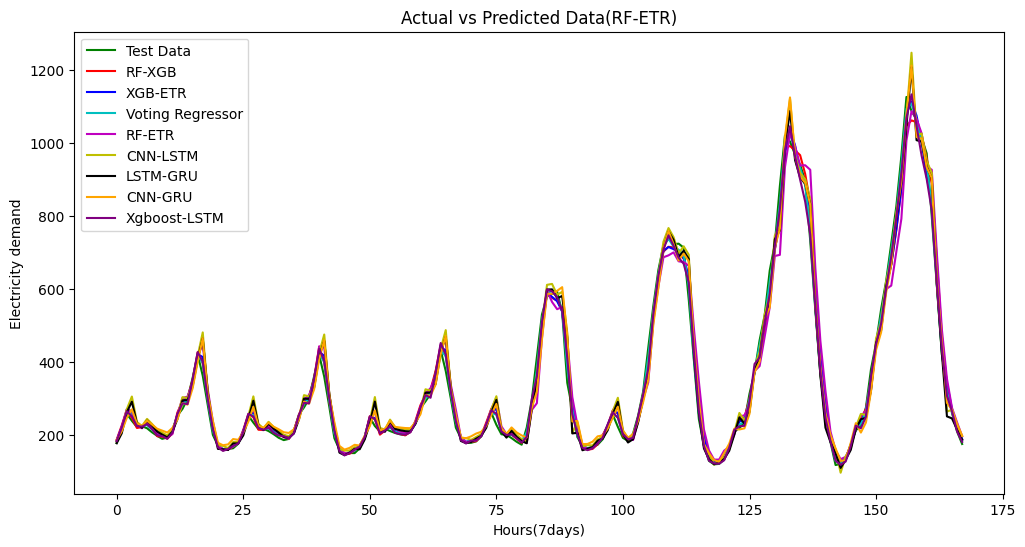

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting test data
plt.plot(range(len(y_test1)), y_test1, 'g', label='Test Data')

# Plotting predicted data
plt.plot(range(len(meta_preds1)), meta_preds1, 'r', label='RF-XGB')
plt.plot(range(len(meta_preds4)), meta_preds4, 'b', label='XGB-ETR')
plt.plot(range(len(meta_preds2)), meta_preds2, 'c', label='Voting Regressor')
plt.plot(range(len(meta_preds3)), meta_preds3, 'm', label='RF-ETR')
plt.plot(range(len(y_pred)), y_pred, 'y', label='CNN-LSTM')
plt.plot(range(len(y_pred5)), y_pred5, 'k', label='LSTM-GRU')
plt.plot(range(len(y_pred6)), y_pred6, 'orange', label='CNN-GRU')
plt.plot(range(len(predictions)), predictions, 'purple', label='Xgboost-LSTM')

# Adding labels and legend
plt.title('Actual vs Predicted Data(RF-ETR)')
plt.xlabel('Hours(7days)')
plt.ylabel('Electricity demand')
plt.legend()

# Display the plot
plt.show()

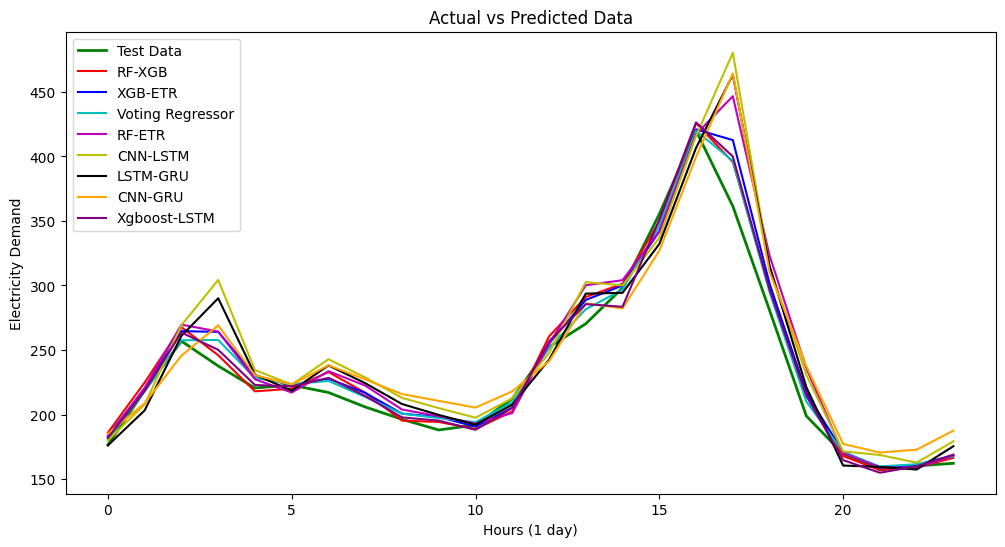

In [ ]:
import matplotlib.pyplot as plt

# Example data points, make sure you have your own data points defined here
y_test11 = y_test1[:24]  # Test data
y_pred12 = meta_preds1[:24]  # Prediction from model 1
y_pred13 = meta_preds4[:24]  # Prediction from model 3
y_pred14 = meta_preds2[:24]  # Prediction from model 4
y_pred15 = meta_preds3[:24]  # Prediction from model 5
y_pred16 = y_pred[:24]  # Prediction from model 3 again (different settings?)
y_pred17 = y_pred5[:24]  # Prediction from model 5 again (different settings?)
y_pred18 = y_pred6[:24]  # Prediction from model 6
y_pred19 = predictions[:24]  # Prediction from model 7

plt.figure(figsize=(12, 6))

# Plotting test data
plt.plot(range(len(y_test11)), y_test11, 'g', label='Test Data', linewidth=2)

# Plotting predicted data from various models
plt.plot(range(len(y_pred12)), y_pred12, 'r', label='RF-XGB')
plt.plot(range(len(y_pred13)), y_pred13, 'b', label='XGB-ETR')
plt.plot(range(len(y_pred14)), y_pred14, 'c', label='Voting Regressor')
plt.plot(range(len(y_pred15)), y_pred15, 'm', label='RF-ETR')
plt.plot(range(len(y_pred16)), y_pred16, 'y', label='CNN-LSTM')
plt.plot(range(len(y_pred17)), y_pred17, 'k', label='LSTM-GRU')
plt.plot(range(len(y_pred18)), y_pred18, 'orange', label='CNN-GRU')
plt.plot(range(len(y_pred19)), y_pred19, 'purple', label='Xgboost-LSTM')

# Adding labels and legend
plt.title('Actual vs Predicted Data')
plt.xlabel('Hours (1 day)')
plt.ylabel('Electricity Demand')
plt.legend(loc='upper left')  # Adjust legend location to avoid blocking the plot

# Display the plot
plt.show()
